In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
dataset,dataset_info=tfds.load('malaria',as_supervised=True,with_info=True,shuffle_files=True,split=["train"])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete9QAPHY/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
len(dataset[0])

27558

In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path=PosixGPath('/tmp/tmpwmxeqy8ktfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},

In [5]:
for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [6]:
def splits(dataset,TRAIN_RATION,VAL_RATION,TEST_RATION):
  DATASET_SIZE=len(dataset)

  train_dataset=dataset.take(int(0.8*DATASET_SIZE))
  val_test_dataset=dataset.skip(int(0.8*DATASET_SIZE))
  val_dataset=val_test_dataset.take(int(VAL_RATION*DATASET_SIZE))
  
  test_dataset=val_test_dataset.skip(int(VAL_RATION*DATASET_SIZE))
  return train_dataset,val_dataset,test_dataset



In [7]:
TRAIN_RATION=0.8
VAL_RATION=0.1
TEST_RATION=0.1
train_dataset,val_dataset,test_dataset=splits(dataset[0],TRAIN_RATION=0.8,VAL_RATION=0.1,TEST_RATION=0.1)
#print(list(train_dataset.take(1).as_numpy_iterator()),
     #list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()))

In [8]:
len(train_dataset),len(val_dataset),len(test_dataset)

(22046, 2755, 2757)

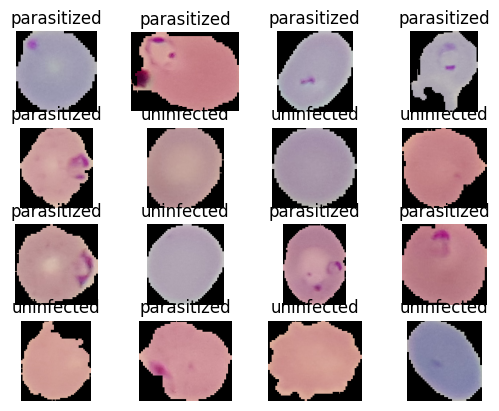

In [9]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  
  ax = plt.subplot(4, 4, i + 1)
  
  plt.imshow(image)
  
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [10]:
dataset_info.features['label'].int2str(0)

'parasitized'

#**Data Preprocessing**

In [11]:
IMG_SIZE=224
def resizing_rescale(image,label):
  return tf.image.resize(image,(IMG_SIZE,IMG_SIZE))/255,label

In [12]:
train_dataset=train_dataset.map(resizing_rescale)
val_dataset=val_dataset.map(resizing_rescale)
test_dataset=test_dataset.map(resizing_rescale)

In [13]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [14]:
len(train_dataset),len(val_dataset),len(test_dataset)

(22046, 2755, 2757)

In [15]:
BATCH_SIZE=32
train_dataset=train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [16]:
val_dataset=val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [17]:

test_dataset=test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [18]:
len(train_dataset),len(val_dataset),len(test_dataset)

(689, 87, 87)

##**Cloning LeNEt model**

In [19]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.Conv2D(filters=6,kernel_size=5, strides= 1,padding="valid", activation="relu" ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    tf.keras.layers.Conv2D(filters=16,kernel_size=5, strides= 1,padding="valid", activation="relu" ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_1 (Batc  (None, 106, 106, 16)     64        
 hNormalization)                                                 
                                                        

In [21]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [22]:
history=model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=10,verbose=1)

Epoch 1/10
689/689 [==============================] - 62s 70ms/step - loss: 0.4000 - accuracy: 0.8147 - val_loss: 0.9746 - val_accuracy: 0.6599
Epoch 2/10
689/689 [==============================] - 47s 69ms/step - loss: 0.2008 - accuracy: 0.9294 - val_loss: 0.1700 - val_accuracy: 0.9408
Epoch 3/10
689/689 [==============================] - 45s 66ms/step - loss: 0.1552 - accuracy: 0.9451 - val_loss: 0.1592 - val_accuracy: 0.9466
Epoch 4/10
689/689 [==============================] - 47s 68ms/step - loss: 0.1343 - accuracy: 0.9524 - val_loss: 0.1840 - val_accuracy: 0.9477
Epoch 5/10
689/689 [==============================] - 46s 67ms/step - loss: 0.1157 - accuracy: 0.9575 - val_loss: 0.1716 - val_accuracy: 0.9463
Epoch 6/10
689/689 [==============================] - 46s 66ms/step - loss: 0.0983 - accuracy: 0.9637 - val_loss: 0.1828 - val_accuracy: 0.9463
Epoch 7/10
689/689 [==============================] - 54s 78ms/step - loss: 0.0724 - accuracy: 0.9752 - val_loss: 0.2173 - val_accuracy:

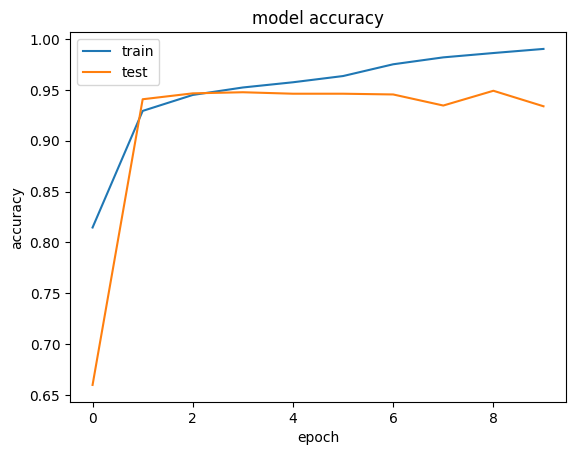

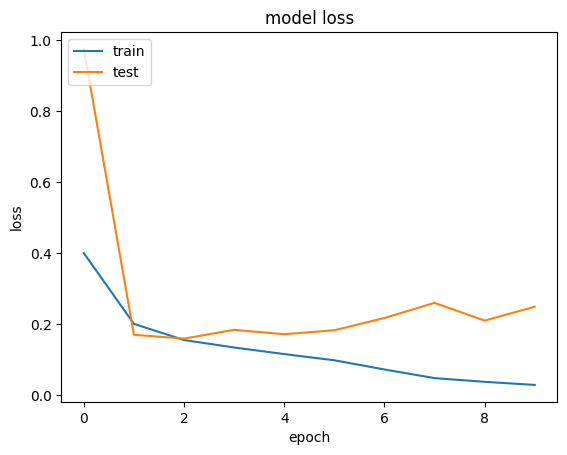

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.evaluate(test_dataset)

87/87 [==============================] - 15s 37ms/step - loss: 0.2987 - accuracy: 0.9246


[0.2986668348312378, 0.9245556592941284]

In [25]:
def parasite_or_not(x):
  if(x<0.5):
    return str("p")
  else:
    return str("u")

1/1 [==============================] - 0s 26ms/step


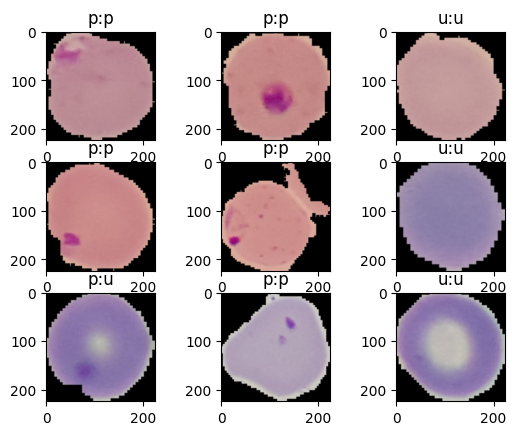

In [26]:
for i,(image,label) in enumerate(test_dataset.take(9)):
  ax=plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))+":"+str(parasite_or_not(model.predict(image)[0][0])))
                                              

##**Load And Save Model**

In [27]:
model.save("lenet")

In [28]:
lenet_loaded_model=tf.keras.models.load_model("lenet")

In [29]:
lenet_loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_1 (Batc  (None, 106, 106, 16)     64        
 hNormalization)                                                 
                                                        

In [30]:
lenet_loaded_model.evaluate(test_dataset)

87/87 [==============================] - 15s 48ms/step - loss: 0.2987 - accuracy: 0.9246


[0.298666775226593, 0.9245556592941284]

1/1 [==============================] - 0s 27ms/step


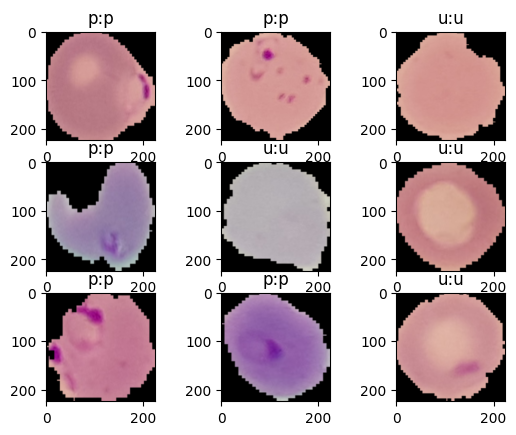

In [31]:
for i,(image,label) in enumerate(test_dataset.take(9)):
  ax=plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))+":"+str(parasite_or_not(lenet_loaded_model.predict(image)[0][0])))
                                              

##**Save Weights**

In [32]:
 model.save_weights("weights/lenet_weights")

##**Creating model with functional API**

In [33]:
IM_SIZE=224
input_funct=tf.keras.layers.Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input Image")
x=tf.keras.layers.Conv2D(filters=6,kernel_size=5, strides= 1,padding="valid", activation="relu" )(input_funct)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D(pool_size=2,strides=2)(x)
x=tf.keras.layers.Conv2D(filters=16,kernel_size=5, strides= 1,padding="valid", activation="relu" )(x)
output=tf.keras.layers.MaxPool2D(pool_size=2,strides=2)(x)

feature_extractor_funct = tf.keras.Model(input_funct,output, name = "Feature_Extractor")

In [34]:
input_funct=tf.keras.layers.Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input Image")
x=feature_extractor_funct(input_funct)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(100,activation="relu")(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(10,activation="relu")(x)
x=tf.keras.layers.BatchNormalization()(x)
output_funct=tf.keras.layers.Dense(1,activation="sigmoid")(x)

API_model=tf.keras.Model(input_funct,output_funct)

In [35]:
API_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Function  (None, 53, 53, 16)       2896      
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 44944)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4494500   
                                                                 
 batch_normalization_5 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 10)                1010  

In [36]:
API_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [37]:
history_1=API_model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=10,verbose=1)

Epoch 1/10
689/689 [==============================] - 48s 65ms/step - loss: 0.5076 - accuracy: 0.7439 - val_loss: 0.8628 - val_accuracy: 0.8323
Epoch 2/10
689/689 [==============================] - 45s 65ms/step - loss: 0.2244 - accuracy: 0.9195 - val_loss: 0.2313 - val_accuracy: 0.9437
Epoch 3/10
689/689 [==============================] - 56s 82ms/step - loss: 0.1694 - accuracy: 0.9420 - val_loss: 0.1679 - val_accuracy: 0.9452
Epoch 4/10
689/689 [==============================] - 52s 76ms/step - loss: 0.1370 - accuracy: 0.9526 - val_loss: 0.1652 - val_accuracy: 0.9485
Epoch 5/10
689/689 [==============================] - 52s 75ms/step - loss: 0.1102 - accuracy: 0.9626 - val_loss: 0.1894 - val_accuracy: 0.9470
Epoch 6/10
689/689 [==============================] - 52s 75ms/step - loss: 0.0781 - accuracy: 0.9736 - val_loss: 0.2109 - val_accuracy: 0.9441
Epoch 7/10
689/689 [==============================] - 45s 66ms/step - loss: 0.0563 - accuracy: 0.9804 - val_loss: 0.1989 - val_accuracy:

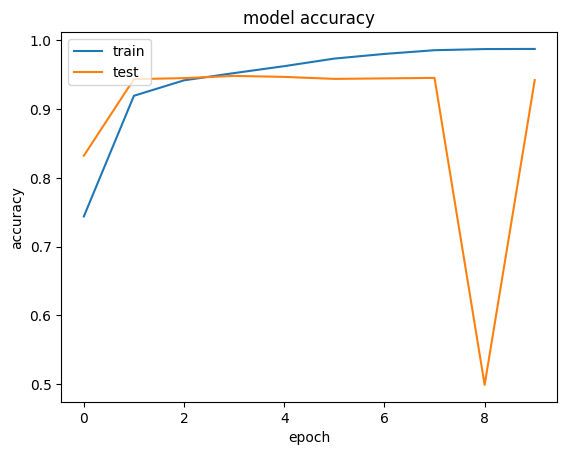

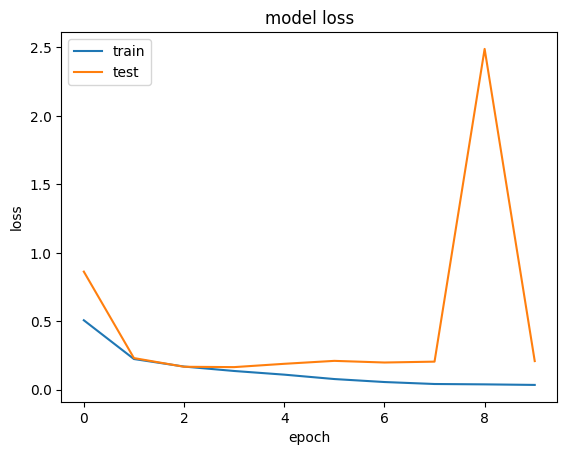

In [38]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
API_model.evaluate(test_dataset)

87/87 [==============================] - 14s 36ms/step - loss: 0.2419 - accuracy: 0.9373


[0.24191473424434662, 0.9372506141662598]

In [40]:
def parasite_or_not(x):
  if(x<0.5):
    return str("p")
  else:
    return str("u")

1/1 [==============================] - 0s 28ms/step


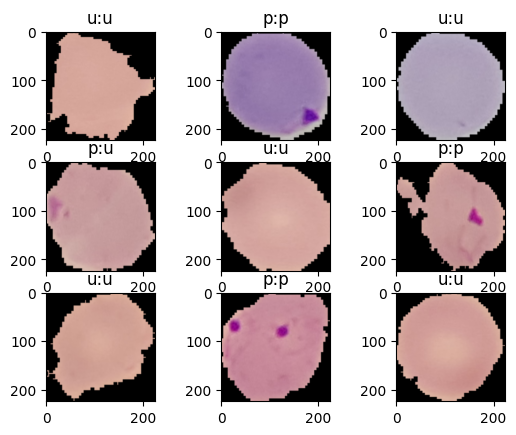

In [41]:
for i,(image,label) in enumerate(test_dataset.take(9)):
  ax=plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))+":"+str(parasite_or_not(API_model.predict(image)[0][0])))
                                              

##**Model Subclassing**

In [42]:
class feature_exctractor(tf.keras.layers.Layer):
  def __init__(self,filters,kernel_size, strides,padding, activation,pool_size):
    super(feature_exctractor,self).__init__()

    self.conv1=tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size, strides=strides,padding=padding, activation=activation)
    self.batch1=tf.keras.layers.BatchNormalization()
    self.pool1=tf.keras.layers.MaxPool2D(pool_size=pool_size,strides=2*strides)


    self.conv2=tf.keras.layers.Conv2D(filters=filters*2,kernel_size=kernel_size, strides=strides,padding=padding, activation=activation)
    self.batch2=tf.keras.layers.BatchNormalization()
    self.pool2=tf.keras.layers.MaxPool2D(pool_size=pool_size,strides=2*strides)

  def call(self,x,training):
    x=self.conv1(x)
    x=self.batch1(x)
    x=self.pool1(x)

    x=self.conv2(x)
    x=self.batch2(x)
    x=self.pool2(x)

    return x

feature_sub_classed = feature_exctractor(8, 3, 1, "valid", "relu", 2)

In [43]:
input_funct=tf.keras.layers.Input(shape = (IM_SIZE, IM_SIZE, 3), name = "Input_Image")
x=feature_sub_classed(input_funct)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(100,activation="relu")(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(10,activation="relu")(x)
x=tf.keras.layers.BatchNormalization()(x)
output_funct=tf.keras.layers.Dense(1,activation="sigmoid")(x)

API_model_=tf.keras.Model(input_funct,output_funct)

In [44]:
API_model_.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_exctractor (feature  (None, 54, 54, 16)       1488      
 _exctractor)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_9 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 10)                1010

In [45]:
class LenetModel(tf.keras.Model):
  def __init__(self):
    super(LenetModel, self).__init__()

    self.feature_sub_classed = feature_exctractor(8, 3, 1, "valid", "relu", 2)
    self.dense_1 = tf.keras.layers.Dense(100, activation = "relu")
    self.batch_1 = tf.keras.layers.BatchNormalization()

    self.dense_2 = tf.keras.layers.Dense(10, activation = "relu")
    self.batch_2 = tf.keras.layers.BatchNormalization()
    

    self.dense_3 = tf.keras.layers.Dense(1, activation = "sigmoid")

  def call(self,x,training):
    x=self.feature_sub_classed(x)
    x=self.dense_1(x) 
    x=self.batch_1(x)  

    x=self.dense_2(x)  
    x=self.batch_2(x) 
    

    x=self.dense_3(x)  

    return x

lenet_sub_classed = LenetModel()
lenet_sub_classed(tf.zeros([1,224,224,3]))
lenet_sub_classed.summary()

Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_exctractor_1 (featu  multiple                 1488      
 re_exctractor)                                                  
                                                                 
 dense_9 (Dense)             multiple                  1700      
                                                                 
 batch_normalization_13 (Bat  multiple                 400       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_14 (Bat  multiple                 40        
 chNormalization)                                                
                                                       

In [46]:
class NeuralearnDense(tf.keras.layers.Layer):
  def __init__(self, output_units, activation):
    super(NeuralearnDense, self).__init__()
    self.output_units = output_units
    self.activation = activation
  
  def build(self, input_features_shape):
    self.w = self.add_weight(shape = (input_features_shape[-1], self.output_units), initializer = "random_normal", trainable = True)
    self.b = self.add_weight(shape = (self.output_units,), initializer = "random_normal", trainable = True)
  
  def call(self, input_features):

    pre_output = tf.matmul(input_features, self.w) + self.b

    if(self.activation == "relu"):
      return tf.nn.relu(pre_output)

    elif(self.activation == "sigmoid"):
      return tf.math.sigmoid(pre_output)

    else:
      return pre_output

In [47]:
IM_SIZE = 224
lenet_custom_model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),

                             feature_exctractor(8, 3, 1, "valid", "relu", 2),

                             tf.keras.layers.Flatten(),
                             
                             NeuralearnDense(100, activation = "relu"),
                             tf.keras.layers.BatchNormalization(),
                             
                             NeuralearnDense(10, activation = "relu"),
                             tf.keras.layers.BatchNormalization(),

                             NeuralearnDense(1, activation = "sigmoid"),

])
lenet_custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_exctractor_2 (featu  (None, 54, 54, 16)       1488      
 re_exctractor)                                                  
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 neuralearn_dense (Neuralear  (None, 100)              4665700   
 nDense)                                                         
                                                                 
 batch_normalization_17 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 neuralearn_dense_1 (Neurale  (None, 10)               1010      
 arnDense)                                            

In [48]:
from tensorflow.keras.metrics import BinaryAccuracy,FalsePositives,FalseNegatives,TruePositives,TrueNegatives,Precision,Recall,AUC

In [49]:
metrics=[FalsePositives(name="FP"),FalseNegatives(name="FN"),TruePositives(name="TP"),TrueNegatives(name="TN"),BinaryAccuracy(name="accuracy"),Precision(name="Precision"),Recall(name="Recall"),AUC(name="AUC")]

In [50]:
lenet_custom_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=metrics)

In [51]:
history_2=lenet_custom_model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=20,verbose=1)

Epoch 1/20
689/689 [==============================] - 51s 68ms/step - loss: 0.3423 - FP: 1770.0000 - FN: 1387.0000 - TP: 9635.0000 - TN: 9254.0000 - accuracy: 0.8568 - Precision: 0.8448 - Recall: 0.8742 - AUC: 0.9303 - val_loss: 0.2305 - val_FP: 167.0000 - val_FN: 44.0000 - val_TP: 1351.0000 - val_TN: 1193.0000 - val_accuracy: 0.9234 - val_Precision: 0.8900 - val_Recall: 0.9685 - val_AUC: 0.9735
Epoch 2/20
689/689 [==============================] - 46s 66ms/step - loss: 0.2163 - FP: 1084.0000 - FN: 619.0000 - TP: 10406.0000 - TN: 9937.0000 - accuracy: 0.9228 - Precision: 0.9057 - Recall: 0.9439 - AUC: 0.9675 - val_loss: 0.2404 - val_FP: 77.0000 - val_FN: 169.0000 - val_TP: 1227.0000 - val_TN: 1282.0000 - val_accuracy: 0.9107 - val_Precision: 0.9410 - val_Recall: 0.8789 - val_AUC: 0.9720
Epoch 3/20
689/689 [==============================] - 49s 72ms/step - loss: 0.1834 - FP: 842.0000 - FN: 609.0000 - TP: 10416.0000 - TN: 10179.0000 - accuracy: 0.9342 - Precision: 0.9252 - Recall: 0.9448

In [52]:
lenet_custom_model.evaluate(test_dataset)

87/87 [==============================] - 14s 37ms/step - loss: 0.5088 - FP: 119.0000 - FN: 68.0000 - TP: 1298.0000 - TN: 1272.0000 - accuracy: 0.9322 - Precision: 0.9160 - Recall: 0.9502 - AUC: 0.9641


[0.5087539553642273,
 119.0,
 68.0,
 1298.0,
 1272.0,
 0.9321726560592651,
 0.9160197377204895,
 0.9502196311950684,
 0.9640896320343018]

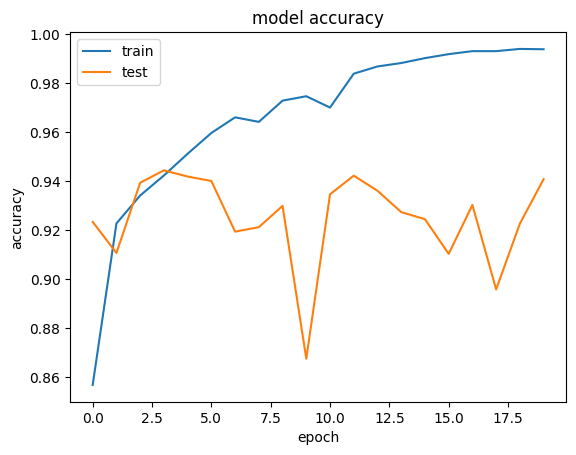

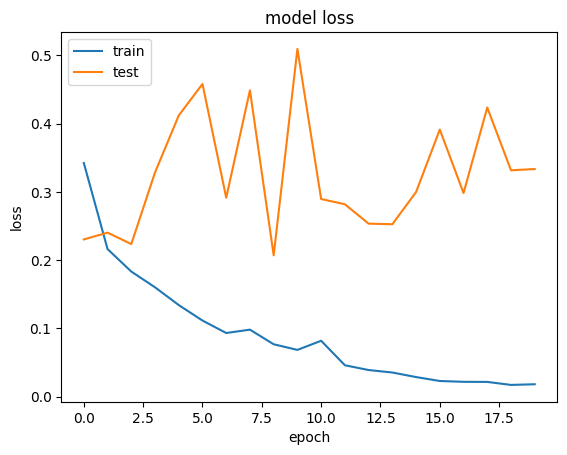

In [53]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##**Visualising Confusion Matrix**

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

In [55]:
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [56]:
len(test_dataset)

87

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

In [58]:
def unbachifyu(dataset):
  images=[]
  labels=[]
  for image,label in dataset.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(label)
  return images,labels

In [59]:
test_image,test_label=unbachifyu(test_dataset)

In [60]:
print(np.array(test_image).shape)

(2757, 224, 224, 3)


In [61]:
labels=np.array([i for i in test_label])
print(labels)

[0 0 1 ... 0 1 0]


In [62]:
print(np.array(labels).shape)

(2757,)


In [63]:
predicted_1=lenet_custom_model.predict(np.array(test_image))
predicted_1
len(predicted_1)

87/87 [==============================] - 1s 15ms/step


2757

In [64]:
predicted_1

array([[4.9106279e-07],
       [2.2564039e-03],
       [9.9995816e-01],
       ...,
       [1.0284284e-05],
       [9.9999714e-01],
       [5.6305322e-05]], dtype=float32)

[[1274  120]
 [  68 1295]]


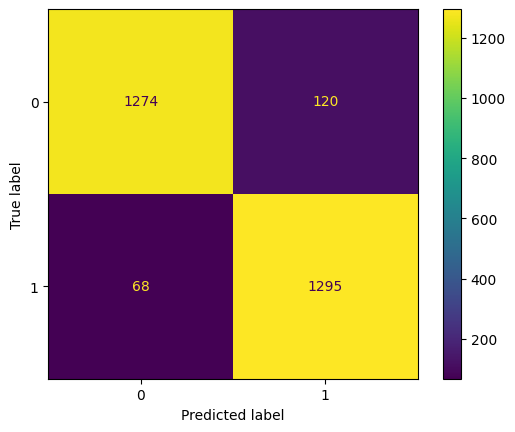

In [65]:
threshold = 0.5

cm = confusion_matrix(labels, predicted_1 > threshold)
print(cm)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()




In [66]:
lenet_custom_model.evaluate(test_dataset)

87/87 [==============================] - 17s 43ms/step - loss: 0.5084 - FP: 120.0000 - FN: 68.0000 - TP: 1301.0000 - TN: 1268.0000 - accuracy: 0.9318 - Precision: 0.9156 - Recall: 0.9503 - AUC: 0.9643


[0.5083557963371277,
 120.0,
 68.0,
 1301.0,
 1268.0,
 0.9318099617958069,
 0.9155524373054504,
 0.9503287076950073,
 0.9642711281776428]

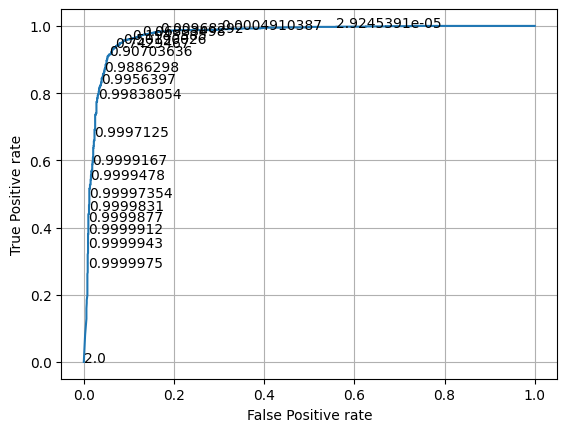

In [67]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels, predicted_1)
plt.plot(fpr,tpr)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.grid()
skip=20
for i in range(0,len(thresholds),skip):
  plt.text(fpr[i], tpr[i], thresholds[i])
plt.show()

In [68]:
parasite_or_not(lenet_custom_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 11s 11s/step


'u'

In [69]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 29ms/step


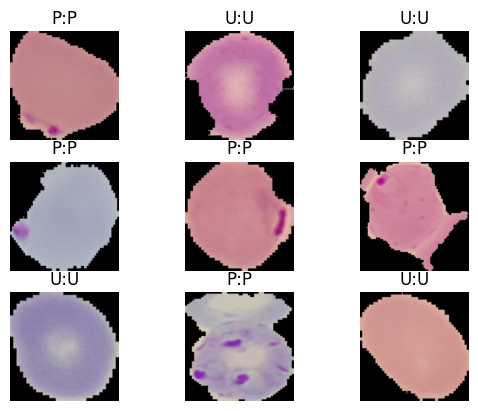

In [70]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_custom_model.predict(image)[0][0])))
  
  plt.axis('off')

##**Setting CallBacks**

In [71]:
csv_callback = tf.keras.callbacks.CSVLogger(
    'logs.csv', separator=',', append=True)

### EarlyStopping

In [72]:
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [73]:
history_3=lenet_custom_model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=20,verbose=1,callbacks=[csv_callback,es_callback])

Epoch 1/20
689/689 [==============================] - 46s 67ms/step - loss: 0.0125 - FP: 47.0000 - FN: 48.0000 - TP: 10977.0000 - TN: 10974.0000 - accuracy: 0.9957 - Precision: 0.9957 - Recall: 0.9956 - AUC: 0.9999 - val_loss: 0.3730 - val_FP: 123.0000 - val_FN: 55.0000 - val_TP: 1337.0000 - val_TN: 1240.0000 - val_accuracy: 0.9354 - val_Precision: 0.9158 - val_Recall: 0.9605 - val_AUC: 0.9665
Epoch 2/20
689/689 [==============================] - 47s 68ms/step - loss: 0.0141 - FP: 58.0000 - FN: 49.0000 - TP: 10974.0000 - TN: 10965.0000 - accuracy: 0.9951 - Precision: 0.9947 - Recall: 0.9956 - AUC: 0.9998 - val_loss: 0.4414 - val_FP: 124.0000 - val_FN: 49.0000 - val_TP: 1349.0000 - val_TN: 1233.0000 - val_accuracy: 0.9372 - val_Precision: 0.9158 - val_Recall: 0.9649 - val_AUC: 0.9638
Epoch 3/20
689/689 [==============================] - 53s 77ms/step - loss: 0.0112 - FP: 38.0000 - FN: 46.0000 - TP: 10980.0000 - TN: 10982.0000 - accuracy: 0.9962 - Precision: 0.9966 - Recall: 0.9958 - AUC

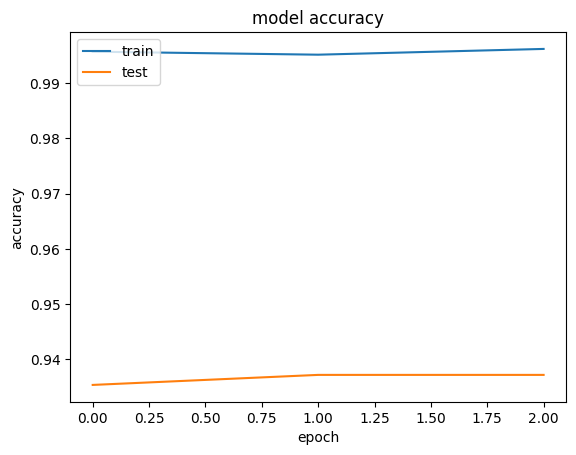

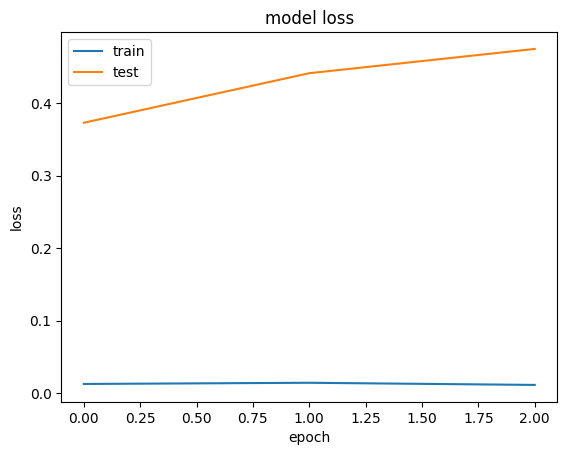

In [74]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
def scheduler(epoch, lr):

  if epoch <= 3:
    learning_rate = lr
  else:
    learning_rate = lr * tf.math.exp(-0.1)
    learning_rate = learning_rate.numpy()
  return learning_rate
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)

In [76]:
history_4=lenet_custom_model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=10,verbose=1,callbacks=[scheduler_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
689/689 [==============================] - 53s 76ms/step - loss: 0.0145 - FP: 62.0000 - FN: 55.0000 - TP: 10968.0000 - TN: 10961.0000 - accuracy: 0.9947 - Precision: 0.9944 - Recall: 0.9950 - AUC: 0.9998 - val_loss: 0.4649 - val_FP: 150.0000 - val_FN: 42.0000 - val_TP: 1346.0000 - val_TN: 1217.0000 - val_accuracy: 0.9303 - val_Precision: 0.8997 - val_Recall: 0.9697 - val_AUC: 0.9565 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
689/689 [==============================] - 46s 67ms/step - loss: 0.0098 - FP: 37.0000 - FN: 29.0000 - TP: 10994.0000 - TN: 10986.0000 - accuracy: 0.9970 - Precision: 0.9966 - Recall: 0.9974 - AUC: 0.9999 - val_loss: 0.4082 - val_FP: 95.0000 - val_FN: 109.0000 - val_TP: 1289.0000 - val_TN: 1262.0000 - val_accuracy: 0.9260 - val_Precision: 0.9314 - val_Recall: 0.9220 - val_AUC: 0.9641 - lr: 0.0010

Epoch 3: LearningRa

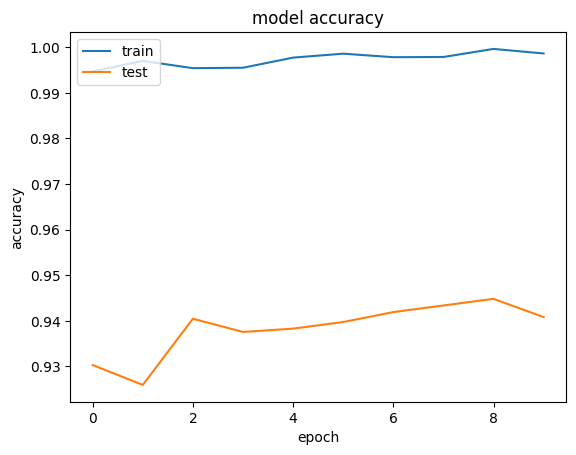

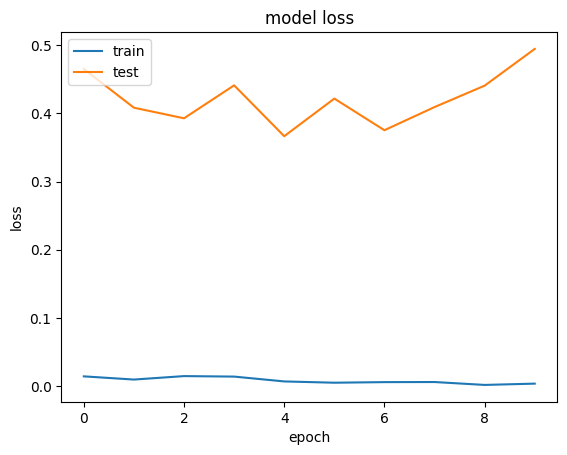

In [77]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()